This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease on their medical attributes.

We're going to follow the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## **1. Problem Definition**

In a statement,
> Given clinical parameters about a patient, can we predict if they have a heart disease or not ?


## **2. Data**



The original data came from Cleaveland data from the UCI Machine Learning Repository.
> https://archive.ics.uci.edu/dataset/45/heart+disease

## **3. Evaluation**

## **4. Features**

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

### **Tools**

In [104]:
# Importing all the tools we need in one block.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#we want to keep our plots inside the notebook
%matplotlib inline

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
 
# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

## **Loading data**

In [58]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
df.shape

(303, 14)

So we have a very small data set of **303 rows** and **14 columns**.

## **Data Exploration**

`Goal : To find out as much as we can about the given data subject matter.`

1. Questions we are trying to solve
2. What kind of data do we have ?
3. What's missing from the data and dealing with them.
4. Analyising outliers
5. How to add, change or remove features to get the most out of our data ?

In [60]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
# Finding out the number of classes present :
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

This is a fairly balanced problem beause we have similar amount of examples in both classes

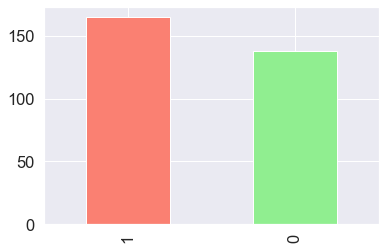

In [62]:
df['target'].value_counts().plot(kind = 'bar', color=['salmon', 'lightgreen']);

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As we can see there are no null values in the data set. So there are no missing values.

In [64]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Heart Disease Frequency wrt Sex**

In [65]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [66]:
# Comparing target columns with 'Sex' column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


So, if the participant is _Male_, we can predict around _half of the time_ that participant will have heart disease.

Similarly, if they are _Female_, we can predict around _75 % of the time_ that participant is having heart disease.

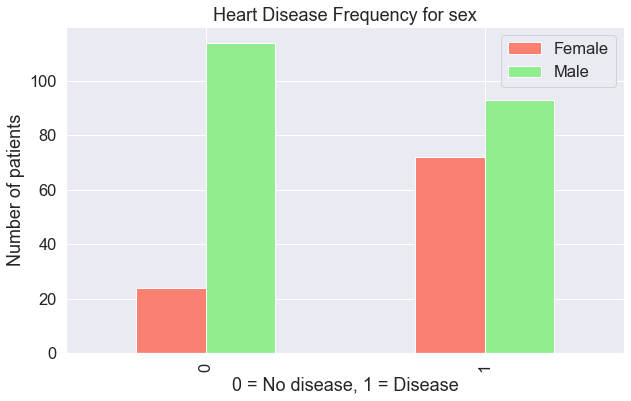

In [67]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=['salmon', 'lightgreen']);

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Number of patients")
plt.legend(['Female', 'Male']);

### **Age vs Max Heart Rate**

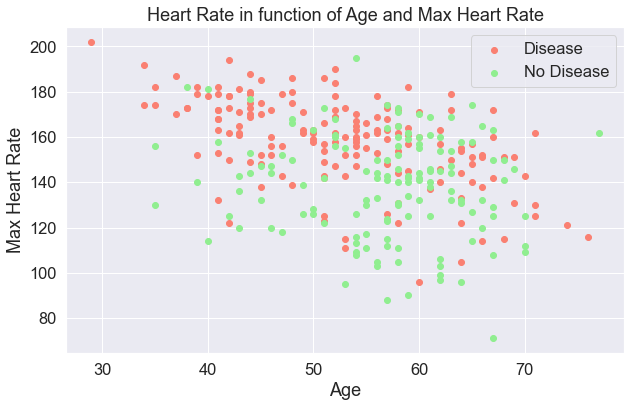

In [68]:
# Create another figure
plt.figure(figsize= (10, 6))

# Scatter with positive examples 
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target==1],
            c= "salmon");

# Scatter with positive examples 
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target==0],
            c= "lightgreen");

# info
plt.title("Heart Rate in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

We can see that : There is a downward trend. This is because the younger someone is the higher their heart rate is.

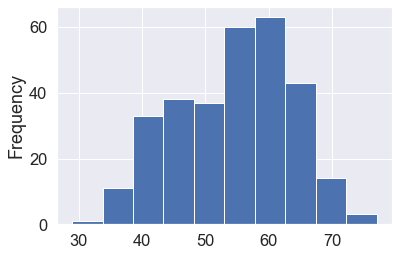

In [69]:
# Checking the distribution of Age column
df.age.plot.hist();

This is a `normal` distribution.

It is a bit swayed to the right, this is because the majority of the dataset is between 50 to 60

### **Heart Disease per Chest Pain Type**

cp : Chest Pain type:

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [70]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


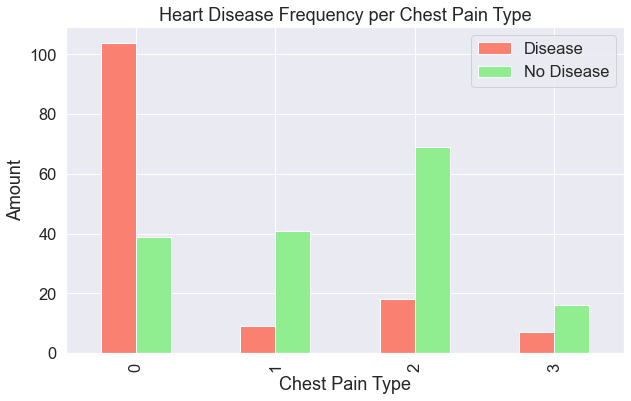

In [71]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize =(10, 6),
                                   color=['salmon', 'lightgreen']);

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(['Disease', 'No Disease']);

### **Building correlational matrices**

In [72]:
# Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

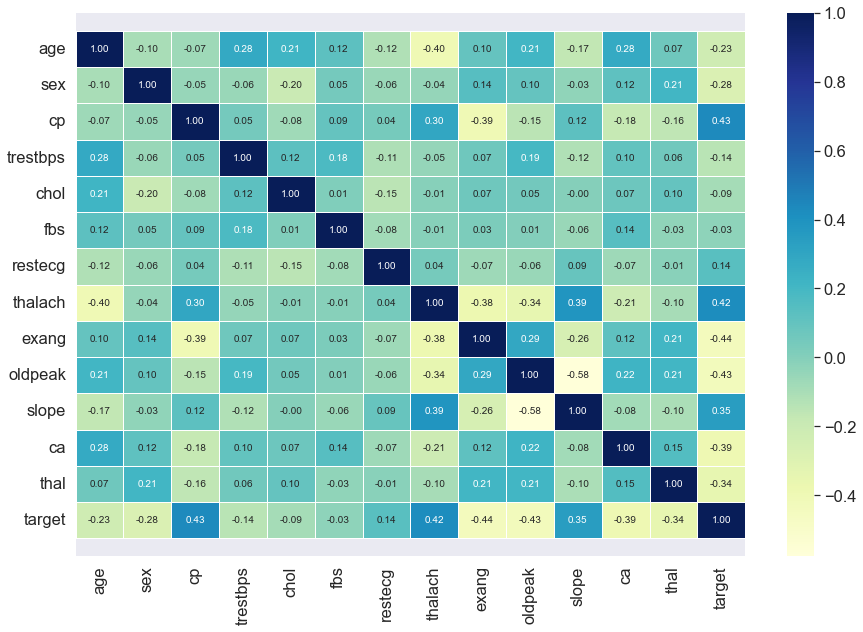

In [73]:
# Let's make our correlation matrix prettier

corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_mat,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)

## **5. Modelling**

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
# Splitting into X and y
X = df.drop('target', axis=1)
y = df.target.values

In [76]:
# Splitting into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [77]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we have our data into training and test split, its time to build the model.

We will train it (Finding patterns) on the training set

And we'll test it (use patterns) on the test set.

We will try and use 3 kinds of models and select which suits best

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [78]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Creating a function to fit and score on the models
def fit_n_score(models, X_train, y_train, X_test, y_test) :
    """
    Fits and evaluates the given machine learning models.
    model : A dictionary of different Scikit learn machine learning models.
    X_train: Training data (No labels)
    X_test : Test data (no labels)
    y_train : Training labels
    y_test : Testing labels
    """

    np.random.seed(42)
    
    # Making a dictionary to store model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():

        # Fitting data in the model 
        model.fit(X_train, y_train)

        # Evaluate model
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [79]:
model_scores = fit_n_score(models=models,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test)

c:\Users\Mitul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## **6. Model Comparision**

<AxesSubplot:>

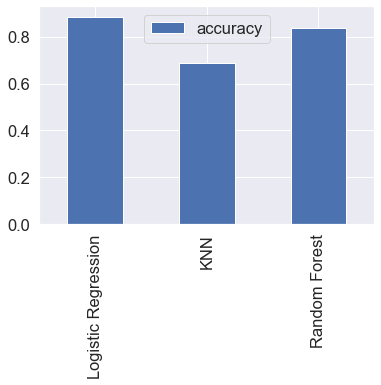

In [81]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

We can see,

`Logistics Regression model just tips out of Random Forest.` 

`KNN is nowhere near the accuracy of the other two.`

Now we will look at the following :

* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall 
* F1 Score
* Classification Report
* ROC Curve
* Area under the Curve

## **7. Hyperparameter Tuning by Hand**

In [82]:
# Let's tune KNN first

train_scores= []
test_scores= []

# Creating list of different values for n neighbours
neighbors = range(1, 21)

# Setting up KNN instance
knn = KNeighborsClassifier()

# Loop through n neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))


In [83]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [84]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score (test data) : 75.41%


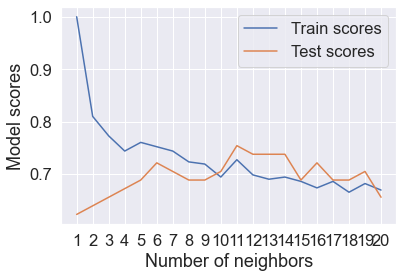

In [85]:
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model scores')
plt.legend()

print(f"Maximum KNN score (test data) : {max(test_scores)*100:.2f}%")

So after the above tuning and breakdown of KNN model, we can conclude that KNN model cannot give us an efficient model.

## **8. Hyperparameter Tuning using RandomizedSearchCV**

We are going to tune :

1. LogisticRegression()
2. RandomForestClassifier()

In [86]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ['liblinear']}

# Create a hyperparameter grid for Randomforestclassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

We now have our `hyperparameter grids` for each of our ML models. Let's tune them with RandomisedSearchCV

In [87]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression model
log_reg_rs  = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv = 5,
                                 n_iter = 20,
                                 verbose= True)

# Fit random hyperparameter search model for LogisticRegression
log_reg_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [88]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [89]:
log_reg_rs.score(X_test, y_test)

0.8852459016393442

`So it's the same as before`

We've tuned Logistic Regression model.

Now let us do the same for RandomForestClassifier

In [90]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setting up hyperparameter search for RandomForestClassifier model
rf_rs = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose= True)
# Fit the hyperparameter search model
rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [91]:
# Finding best fit

rf_rs.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [92]:
rf_rs.score(X_test, y_test)

0.8688524590163934

## **9. Hyperparameter Tuning using GridSearchCV**

Since, our LogisticRegression model provides us with the best scores so far, we'll try and improve them again using GridSearchCV

In [93]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ['liblinear']}

# Setup hyperparameter search for LogisticRegression
log_reg_gs = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv= 5,
                          verbose = True)
# Fit hyperparameter search model
log_reg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [94]:
# Check the best hyperparameters 
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
# Evaluate grid search for LogisticRegression model
log_reg_gs.score(X_test, y_test)

0.8852459016393442

We are _still_ at the exact same result

## **10. Evaluating our tuned machine learning model**

We want
* ROC Curve and AUC Score
* Precision
* Confusion matrix
* Classification Report
* Recall
* F1 Score

It would be great if cross validation was used where possible

In [96]:
# Making predictions 
y_preds = log_reg_gs.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

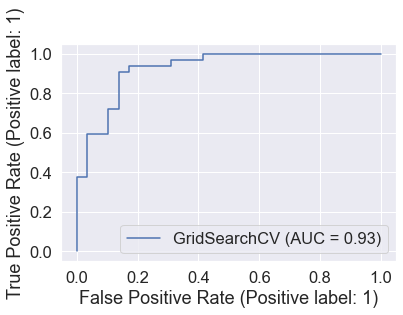

In [97]:
# Plot ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=log_reg_gs, 
                               X=X_test, 
                               y=y_test); 

In [98]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


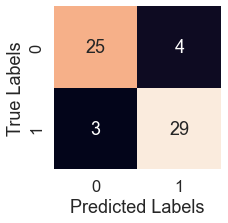

In [99]:
sns.set_theme(font_scale= 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn heatmap
    """

    fig, ax = plt.subplots(figsize= (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True,
                     cbar= False,)
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plot_conf_matrix(y_test, y_preds)

In [100]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Now, these conclusions are only based on **one test split only**. So, we need to recalculate the metrics using **cross-validation** which makes it more accurate.

In [101]:
# Check the best hyperparameters 
log_reg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
# Create a new classifier with best params 
best_clf = LogisticRegression(C= 0.20433597178569418,
                              solver = 'liblinear')

In [107]:
# Cross-validated accuracy
cv_acc = cross_val_score(best_clf, 
                         X, 
                         y,
                         cv=5,
                         scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [110]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [111]:
# Cross-validated precision
cv_precison = cross_val_score(best_clf,
                              X,                              
                              y,
                              cv= 5,
                              scoring="precision")

cv_precison = np.mean(cv_precison)
cv_precison

0.8207936507936507

In [116]:
# Cross-validated recall
cv_recall = cross_val_score(best_clf,
                              X,                              
                              y,
                              cv= 5,
                              scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [117]:
# Cross-validated f1-score
cv_f1 = cross_val_score(best_clf,
                              X,                              
                              y,
                              cv= 5,
                              scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [120]:
# Visualizing the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision" : cv_precison,
                          "Recall": cv_recall,
                          "F1 Score": cv_f1},
                          index = [0])
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


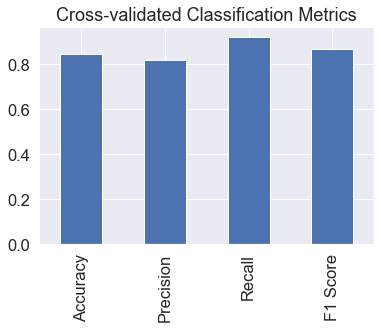

In [122]:
cv_metrics.T.plot.bar(title = "Cross-validated Classification Metrics",
                      legend= False);